## Preliminaries:  load libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import nonparametric_stats as nps
import sys
import re

## Import data into Pandas dataframe

In [41]:
dataFilePath = './data/online_shoppers_intention.csv'
shopIntent_df = pd.read_csv(dataFilePath, header=0, delimiter=',')
featureNames = shopIntent_df.columns.values

## Inspect resultant dataframe

In [12]:
shopIntent_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [14]:
type(shopIntent_df['Month'].values[0])

str

In [17]:
type(shopIntent_df['Weekend'].values[0])

numpy.bool_

In [18]:
np.unique(shopIntent_df['ProductRelated'].values)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [20]:
np.unique(shopIntent_df['OperatingSystems'].values)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [21]:
np.unique(shopIntent_df['Browser'].values)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [31]:
feature_diversity = {c: np.unique(shopIntent_df[c].values) for c in shopIntent_df.columns.values}
feature_diversity['TrafficType']

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [24]:
shopIntent_df.columns.values

array(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype=object)

### Use Bayes' Formula to calulate probability of a "hit" given a particular categorical value of a feature 

In [80]:
p_Hit = np.sum(shopIntent_df['Revenue'].values) / shopIntent_df['Revenue'].values.shape[0]
p_Miss = np.sum(~shopIntent_df['Revenue'].values) / shopIntent_df['Revenue'].values.shape[0]
p_OS = {f:np.sum(shopIntent_df['OperatingSystems'].values == f) / shopIntent_df['OperatingSystems'].values.shape[0]
        for f in feature_diversity['OperatingSystems']}
p_OS_given_Hit = {f:np.sum(shopIntent_df['Revenue'].values[
    shopIntent_df['OperatingSystems'].values == f])/np.sum(shopIntent_df['Revenue'].values)
          for f in feature_diversity['OperatingSystems']}

p_OS_given_Miss = {f:np.sum(~shopIntent_df['Revenue'].values[
    shopIntent_df['OperatingSystems'].values == f])/np.sum(~shopIntent_df['Revenue'].values)
          for f in feature_diversity['OperatingSystems']}

p_Hit_given_OS = {os: p_OS_given_Hits[os] * p_Hit / p_OS[os] 
                  for os in feature_diversity['OperatingSystems']}

p_OS_by_Sum = {os: p_OS_given_Hit[os]*p_Hit + p_OS_given_Miss[os]*p_Miss 
               for os in feature_diversity['OperatingSystems']}

# Just verifying the "shortcut" for the denominator here...
print(p_OS)
print(p_OS_by_Sum)


{1: 0.20965125709651258, 2: 0.535360908353609, 3: 0.20721816707218166, 4: 0.03876723438767234, 5: 0.00048661800486618007, 6: 0.0015409570154095702, 7: 0.0005677210056772101, 8: 0.006407137064071371}
{1: 0.20965125709651258, 2: 0.535360908353609, 3: 0.20721816707218169, 4: 0.03876723438767235, 5: 0.00048661800486618007, 6: 0.0015409570154095702, 7: 0.0005677210056772101, 8: 0.00640713706407137}


### Generalize above into modular function so that we can investigate other features this way

In [ ]:
def BayesHitProbByCatFeat(binTargs, featureVec, valuesSet):
    
    p_Hit = np.sum(binTargs) / binTargs.shape[0]
    
    p_Val = {v:np.sum(featureVec == v) / featureVec.shape[0] 
             for v in valuesSet}
    
    p_Val_given_Hit = {v:np.sum(binTargs[featureVec == v]
                               )/np.sum(binTargs) 
                       for v in valuesSet}
    
    p_Hit_given_Val = {v: p_Val_given_Hit[v] * p_Hit / p_Val[v] 
                      for v in valuesSet}
    
    return p_Hit_given_Val


def BayesHitProbByCatFeat2(targsVec, featureVec, targVal, featValuesSet):
    
    p_Hit = np.sum(targsVec == targVal) / targsVec.shape[0]
    
    p_featVal = {fv:np.sum(featureVec == fv) / featureVec.shape[0] 
                 for fv in featValuesSet}
    
    p_featVal_given_Hit = {fv:np.sum(targsVec[featureVec == fv] == targVal
                               ) / np.sum(targsVec == targVal) 
                           for fv in featValuesSet}
    
    p_Hit_given_featVal = {fv: p_featVal_given_Hit[fv] * p_Hit / p_featVal[fv] 
                           for fv in featValuesSet}
    
    return p_Hit_given_featVal

### Define function to compute number of hit occurances per category of a feature

In [ ]:
def HitCountsByCatFeat(targsVec, featureVec, targVal, featValuesSet):
    
    hitCounts = {fv: np.sum(targsVec[featureVec == fv] == targVal) 
                 for fv in featValuesSet}
    return hitCounts

### Revenue probability by visitor OS type

In [94]:
print(BayesHitProbByCatFeat(shopIntent_df['Revenue'].values, 
                      shopIntent_df['OperatingSystems'].values,
                      feature_diversity['OperatingSystems']))

osRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                             shopIntent_df['OperatingSystems'].values,
                             True,
                             feature_diversity['OperatingSystems'])
print(osRevProbs)


{1: 0.14661508704061893, 2: 0.17497348886532343, 3: 0.10489236790606654, 4: 0.17782426778242677, 5: 0.16666666666666666, 6: 0.10526315789473684, 7: 0.14285714285714285, 8: 0.21518987341772147}
{1: 0.14661508704061893, 2: 0.17497348886532343, 3: 0.10489236790606654, 4: 0.17782426778242677, 5: 0.16666666666666666, 6: 0.10526315789473684, 7: 0.14285714285714285, 8: 0.21518987341772147}


Text(0.5, 0, 'OS id')

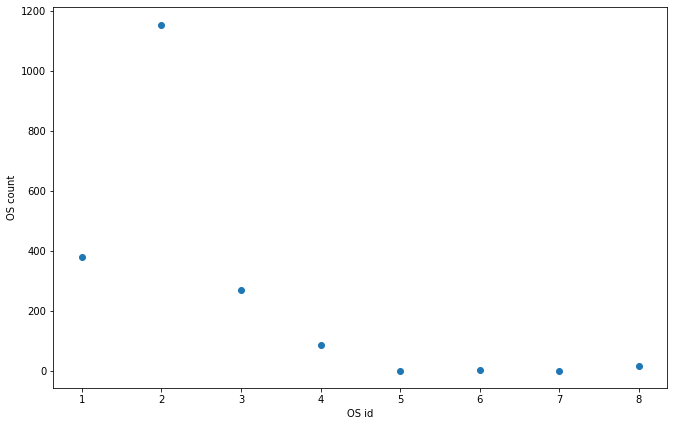

In [139]:
osHitCounts = HitCountsByCatFeat(shopIntent_df['Revenue'].values, 
                             shopIntent_df['OperatingSystems'].values,
                             True,
                             feature_diversity['OperatingSystems'])

fig7, ax7 = plt.subplots(nrows=1, ncols=1)
fig7.set_size_inches(11,7)
xVec = np.array([kv for kv in feature_diversity['OperatingSystems']])
yVec = np.array([osHitCounts[kv] for kv in feature_diversity['OperatingSystems']])
ax7.scatter(xVec, yVec)
ax7.set_ylabel('OS count')
ax7.set_xlabel('OS id')

### Revenue probability by browser type

In [140]:
browserRevHitProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Browser'].values,
                       True,
                       feature_diversity['Browser'])
browserRevHitProbs

{1: 0.14825345247766042,
 2: 0.15362391659339278,
 3: 0.04761904761904762,
 4: 0.17663043478260868,
 5: 0.1841541755888651,
 6: 0.11494252873563218,
 7: 0.12244897959183675,
 8: 0.15555555555555553,
 9: 0.0,
 10: 0.19631901840490798,
 11: 0.16666666666666666,
 12: 0.3,
 13: 0.26229508196721313}

Browser types 9 and 3 appear have small or zero hit probabilities. Types 12 and 13 have comparatively high Revenue probabilities.

Text(0.5, 0, 'Browser id')

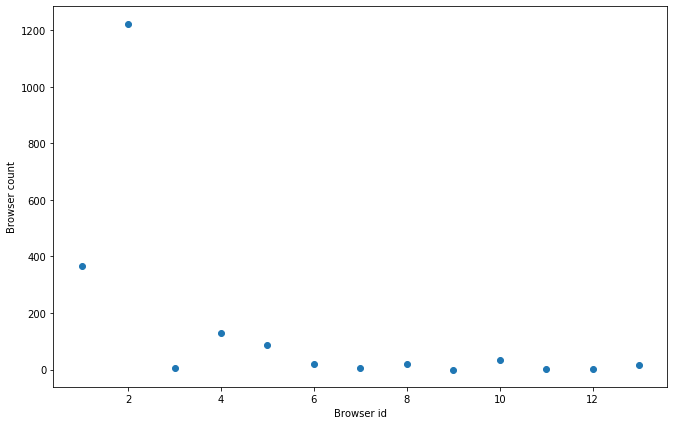

In [142]:
browserHitCounts = HitCountsByCatFeat(shopIntent_df['Revenue'].values, 
                             shopIntent_df['Browser'].values,
                             True,
                             feature_diversity['Browser'])

fig8, ax8 = plt.subplots(nrows=1, ncols=1)
fig8.set_size_inches(11,7)
xVec = np.array([kv for kv in feature_diversity['Browser']])
yVec = np.array([browserHitCounts[kv] for kv in feature_diversity['Browser']])
ax8.scatter(xVec, yVec)
ax8.set_ylabel('Browser count')
ax8.set_xlabel('Browser id')

### Revenue probability by Region

In [96]:
BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Region'].values,
                       True,
                       feature_diversity['Region'])

{1: 0.1612970711297071,
 2: 0.16549295774647887,
 3: 0.14523512276321263,
 4: 0.14805414551607446,
 5: 0.16352201257861634,
 6: 0.1391304347826087,
 7: 0.15637319316688567,
 8: 0.12903225806451615,
 9: 0.16829745596868884}

Hit probabilities across different regions appear roughly equal. The Region feature by itself does not appear to be strong predictor of Revenue hits. I may not include this feature in the model to reduce complexity and improve generalization.

Text(0.5, 0, 'Browser id')

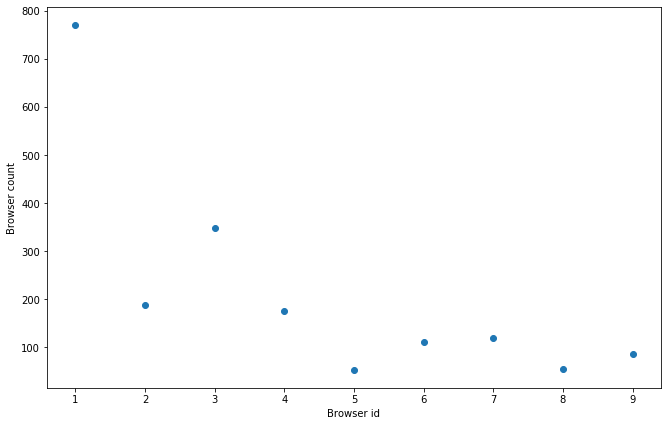

In [144]:
regionHitCounts = HitCountsByCatFeat(shopIntent_df['Revenue'].values, 
                             shopIntent_df['Region'].values,
                             True,
                             feature_diversity['Region'])

fig9, ax9 = plt.subplots(nrows=1, ncols=1)
fig9.set_size_inches(11,7)
xVec = np.array([kv for kv in feature_diversity['Region']])
yVec = np.array([regionHitCounts[kv] for kv in feature_diversity['Region']])
ax9.scatter(xVec, yVec)
ax9.set_ylabel('Browser count')
ax9.set_xlabel('Browser id')

### Revenue probability by ProductRelated ID

In [124]:
prodRelRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['ProductRelated'].values,
                       True,
                       feature_diversity['ProductRelated'])
prodRelRevProbs

{0: 0.15789473684210525,
 1: 0.02090032154340836,
 2: 0.04301075268817204,
 3: 0.05458515283842795,
 4: 0.04455445544554455,
 5: 0.05235602094240838,
 6: 0.06060606060606061,
 7: 0.08951406649616368,
 8: 0.11351351351351349,
 9: 0.10725552050473183,
 10: 0.15151515151515152,
 11: 0.11688311688311687,
 12: 0.12779552715654954,
 13: 0.15570934256055366,
 14: 0.1713147410358566,
 15: 0.14814814814814814,
 16: 0.14615384615384613,
 17: 0.17699115044247787,
 18: 0.145,
 19: 0.19266055045871558,
 20: 0.17333333333333334,
 21: 0.2110552763819095,
 22: 0.20657276995305165,
 23: 0.18333333333333335,
 24: 0.18229166666666666,
 25: 0.14285714285714285,
 26: 0.18709677419354837,
 27: 0.20338983050847456,
 28: 0.20138888888888887,
 29: 0.2074074074074074,
 30: 0.2605633802816902,
 31: 0.20312499999999997,
 32: 0.29411764705882354,
 33: 0.19834710743801656,
 34: 0.20388349514563103,
 35: 0.1881188118811881,
 36: 0.11818181818181817,
 37: 0.22033898305084743,
 38: 0.19101123595505615,
 39: 0.17431192

It is important to notice that ProductRelated values run continuously in the low end, but are increasingly missing in the high end. Strongly suspect that products with high-valued ProductRelated IDs are less often purchased as hit probabilities are increasingly striated (i.e. taking on values of 1/3, 1/2, 1, and 0) as ProductMethod ID values increase.  Need to look at counts across ProductMethod ID values. It appears that if no vistor dwelled on page of a given product, then that product does not appear in this dataset.  Need to fill these holes in the dataset, *somehow*, before training a model.

In [103]:
prodRelHitCounts = HitCountsByCatFeat(shopIntent_df['Revenue'].values, 
                                      shopIntent_df['ProductRelated'].values,
                                      True,
                                      feature_diversity['ProductRelated'])

In [111]:
np.array(prodRelHitCounts.keys())

array(dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 202, 204, 205, 206, 207, 210, 211, 213, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227

Text(0.5, 0, 'ProductRelated id')

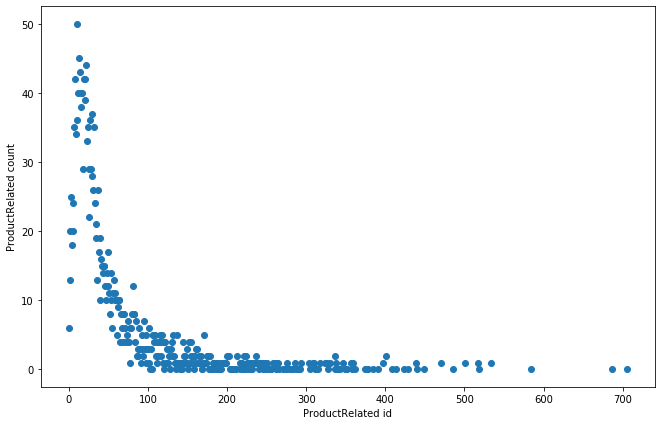

In [134]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
fig1.set_size_inches(11,7)
xVec = np.array([kv for kv in feature_diversity['ProductRelated']])
yVec = np.array([prodRelHitCounts[kv] for kv in feature_diversity['ProductRelated']])
ax1.scatter(xVec, yVec)
ax1.set_ylabel('ProductRelated count')
ax1.set_xlabel('ProductRelated id')

ProductRelated id categories are *NOT* uniformly distributed in this dataset. It appears that many were not sampled.  Will need to select a predictive model type that can account for these obstacles.

Consider fitting a function to this to interpolate missing values here? Kernel smoothing via convolution is another way to interpolate. A convolutional neural network might be a candidate model that can handle this scenario...

### Plot correlation scatter of revenue probability over median duration for each category of ProductRelated

In [126]:
def MedianDurationByCatFeat(dursVec, featureVec, featValuesSet):
    return {fv: np.median(dursVec[featureVec == fv]) for fv in featValuesSet}

(-500, 10000.0)

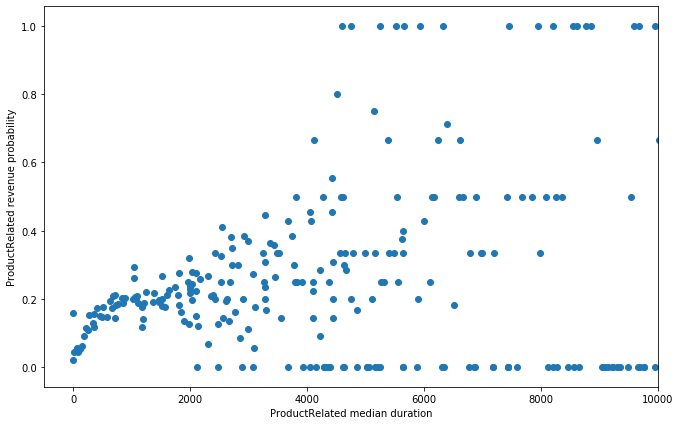

In [135]:
prodRelMedDurs = MedianDurationByCatFeat(shopIntent_df['ProductRelated_Duration'].values, 
                                       shopIntent_df['ProductRelated'].values,
                                       feature_diversity['ProductRelated'])

fig2, ax2 = plt.subplots(nrows=1, ncols=1)
fig2.set_size_inches(11,7)
xVec = np.array([prodRelMedDurs[kv] for kv in feature_diversity['ProductRelated']])
yVec = np.array([prodRelRevProbs[kv] for kv in feature_diversity['ProductRelated']])
ax2.scatter(xVec, yVec)
ax2.set_ylabel('ProductRelated revenue probability')
ax2.set_xlabel('ProductRelated median duration')
ax2.set_xlim([-500,1e4])

Revenue probability of ProductRelated categories correlates positively with the median duration that visitors spend on pages of those categories. The correlation loosens with less commonly viewed products however. Again, notice the striations in revenue probability due to the sparse sampling of uncommon categories.

### Revenue probability by Administrative category

In [121]:
adminRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Administrative'].values, 
                       True,
                       feature_diversity['Administrative'])
adminRevProbs

{0: 0.08911234396671289,
 1: 0.21491875923190545,
 2: 0.18402154398563733,
 3: 0.19016393442622948,
 4: 0.19999999999999998,
 5: 0.20521739130434782,
 6: 0.2569444444444444,
 7: 0.19526627218934908,
 8: 0.2543554006968641,
 9: 0.27111111111111114,
 10: 0.20915032679738563,
 11: 0.2952380952380952,
 12: 0.24418604651162787,
 13: 0.33928571428571425,
 14: 0.27272727272727276,
 15: 0.21052631578947367,
 16: 0.3333333333333333,
 17: 0.25,
 18: 0.16666666666666666,
 19: 0.16666666666666666,
 20: 0.5,
 21: 0.0,
 22: 0.5,
 23: 0.0,
 24: 0.0,
 26: 1.0,
 27: 0.0}

Notice that Administrative ID value 25 is missing here.  How many different Administrative ID values are there in the population? Do IDs range from  0 through 27, or do they go beyond 27?  It appears that 25 is missing in this dataset simply because site vistors did not navigate to it.  Could that be the case for possibe IDs greater than 27 as well?  Best course here would be to seek answers from the site developers.

Text(0.5, 0, 'Admin id')

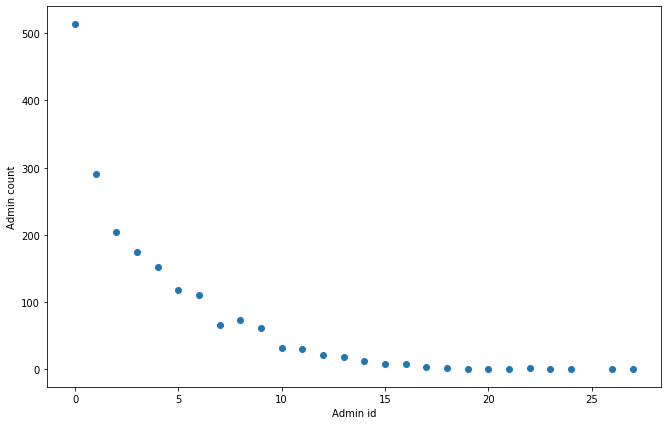

In [136]:
adminHitCounts = HitCountsByCatFeat(shopIntent_df['Revenue'].values, 
                                    shopIntent_df['Administrative'].values,
                                    True,
                                    feature_diversity['Administrative'])
fig3, ax3 = plt.subplots(nrows=1, ncols=1)
fig3.set_size_inches(11,7)
xVec = np.array([kv for kv in feature_diversity['Administrative']])
yVec = np.array([adminHitCounts[kv] for kv in feature_diversity['Administrative']])
ax3.scatter(xVec, yVec)
ax3.set_ylabel('Admin count')
ax3.set_xlabel('Admin id')

Administrative categories are also *NOT* uniformly distributed in dataset.  It appears that Admin IDs were assigned in order of frequency visited: most frequent getting lowest-valued ID number.

Text(0.5, 0, 'Admin median duration')

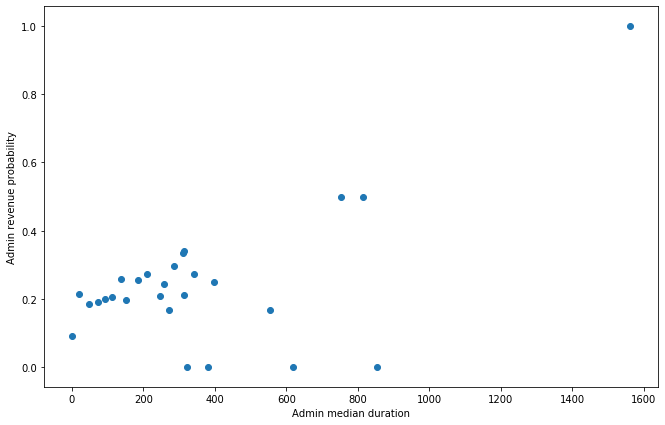

In [137]:
adminMedDurs = MedianDurationByCatFeat(shopIntent_df['Administrative_Duration'].values, 
                                       shopIntent_df['Administrative'].values,
                                       feature_diversity['Administrative'])

fig4, ax4 = plt.subplots(nrows=1, ncols=1)
fig4.set_size_inches(11,7)
xVec = np.array([adminMedDurs[kv] for kv in feature_diversity['Administrative']])
yVec = np.array([adminRevProbs[kv] for kv in feature_diversity['Administrative']])
ax4.scatter(xVec, yVec)
ax4.set_ylabel('Admin revenue probability')
ax4.set_xlabel('Admin median duration')

In [ ]:
np.scipy.stats.pearson()

### Revenue probability by Informational category

In [132]:
infoRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Informational'].values, 
                       True,
                       feature_diversity['Informational'])
infoRevProbs

{0: 0.13351891947623465,
 1: 0.22670509125840538,
 2: 0.21153846153846156,
 3: 0.24473684210526317,
 4: 0.27927927927927926,
 5: 0.3131313131313131,
 6: 0.2179487179487179,
 7: 0.16666666666666669,
 8: 0.2857142857142857,
 9: 0.4,
 10: 0.2857142857142857,
 11: 0.0,
 12: 0.39999999999999997,
 13: 0.0,
 14: 0.0,
 16: 0.0,
 24: 0.0}

Same issue here as with ProductRelated and Administrative features; categories appear to be missing.  Let's examine how numerical category labels were assigned for the Informational feature. 

Text(0.5, 0, 'Info id')

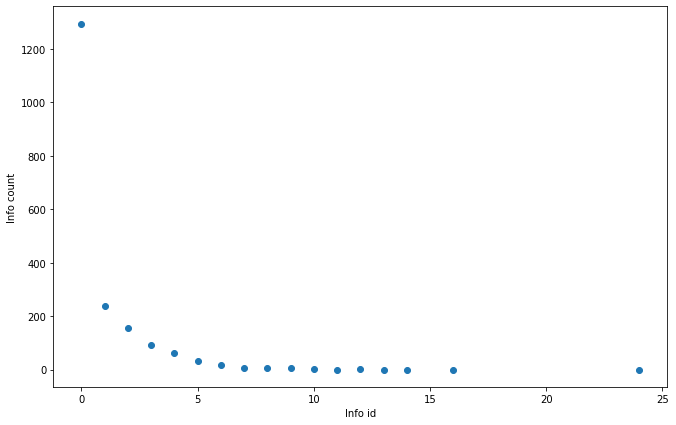

In [133]:
infoHitCounts = HitCountsByCatFeat(shopIntent_df['Revenue'].values, 
                                    shopIntent_df['Informational'].values,
                                    True,
                                    feature_diversity['Informational'])
fig5, ax5 = plt.subplots(nrows=1, ncols=1)
fig5.set_size_inches(11,7)
xVec = np.array([kv for kv in feature_diversity['Informational']])
yVec = np.array([infoHitCounts[kv] for kv in feature_diversity['Informational']])
ax5.scatter(xVec, yVec)
ax5.set_ylabel('Info count')
ax5.set_xlabel('Info id')

Text(0.5, 0, 'Info median duration')

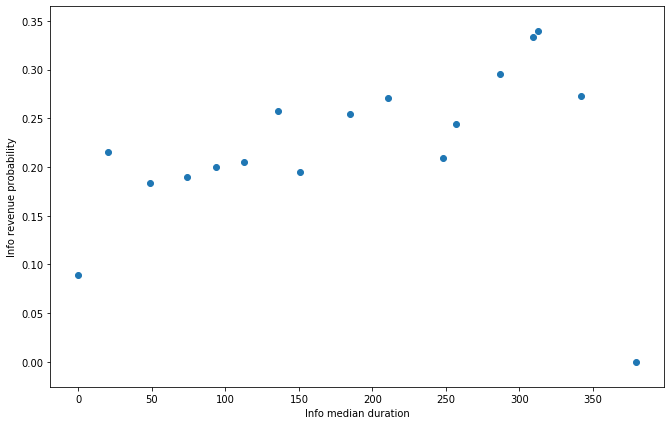

In [138]:
infoMedDurs = MedianDurationByCatFeat(shopIntent_df['Informational_Duration'].values, 
                                       shopIntent_df['Informational'].values,
                                       feature_diversity['Informational'])

fig6, ax6 = plt.subplots(nrows=1, ncols=1)
fig6.set_size_inches(11,7)
xVec = np.array([adminMedDurs[kv] for kv in feature_diversity['Informational']])
yVec = np.array([adminRevProbs[kv] for kv in feature_diversity['Informational']])
ax6.scatter(xVec, yVec)
ax6.set_ylabel('Info revenue probability')
ax6.set_xlabel('Info median duration')

### Investigate revenue probability by month

In [93]:
monthRevProbs = BayesHitProbByCatFeat2(shopIntent_df['Revenue'].values, 
                       shopIntent_df['Month'].values, 
                       True,
                       feature_diversity['Month'])

{'Aug': 0.17551963048498845,
 'Dec': 0.1250723798494499,
 'Feb': 0.01630434782608696,
 'Jul': 0.15277777777777776,
 'June': 0.10069444444444443,
 'Mar': 0.10068169900367069,
 'May': 0.10850178359096313,
 'Nov': 0.2535023348899266,
 'Oct': 0.20947176684881602,
 'Sep': 0.1919642857142857}

Months of January and April are missing. Is this because none of the visitors purchased items during these months? Need to fill these holes in the dataset so that the model can process (i.e. make predictions for) these two months for which there is no training data. Insert median Hit values for these? How?

Perhaps convert months to numerical values and plot probabilities in ordered time sequence to see if there are seasonal trends

In [ ]:
monthConv = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
